This notebook is to test the code for writing everything into a class structure. This is to help make better use of controling what data is incoming.

In [3]:
import sys, os
import glob
import matplotlib.pylab as plt
import numpy as np
import scipy as sp
import pandas as pd

%matplotlib notebook

# for users that has this already install, please just reference the repo
SciAnalysis_PATH='/Users/wenbinli/SciAnalysis'
SciAnalysis_PATH in sys.path or sys.path.append(SciAnalysis_PATH)


from SciAnalysis import tools
from SciAnalysis.XSAnalysis.Data import Data2DScattering, Calibration, Mask

In [2]:
# Set the calibration and the mask for the experiment of interest

In [4]:
c1 = Calibration(wavelength_A=0.9184)
c1.set_image_size(981, height=1043) # Pilatus1M
c1.set_pixel_size(pixel_size_um=172.0)

c1.set_beam_position(585.5, 1043-433) #After moving closer on 3/18 evening
c1.set_distance(0.198) #450004


mask_dir = SciAnalysis_PATH + '/SciAnalysis/XSAnalysis/masks/'
m1 = Mask(mask_dir+'Dectris/Pilatus800k_vertical_gaps-mask.png')

In [4]:
sci_data = Data2DScattering(calibration= c1, mask= m1, name = 'test')
filepath = '/Users/wenbinli/Library/CloudStorage/Box-Box/BNL March 2022 Data/AMohite2/maxs/raw'

sci_data.load(infile = filepath +'/'+"FAPI_MACl_hum_light_4_113.6s_RH94.012_x-0.000_th0.200_1.00s_451095_maxs.tiff")


In [29]:
# L=sci_data.circular_average()
# L.x

In [65]:
# lets start inherting some classes




class GIWAXS_analysis(Data2DScattering):

    # initializing the cl
    def __init__(self, calibration_obj, mask_obj, name, filename):
        super().__init__(calibration = calibration_obj, mask = mask_obj, name = name)

        # loading data and extracting the data from the pattern =
        # self.data = Data2DScattering(calibration= calibration_obj, mask= m1, name = 'test')
        self.load(infile = filename)

    def sector_cut(self, chi, d_chi):
        
        # self.load(infile = filename)
        
        Line = self.sector_average_q_bin(angle=chi, dangle=d_chi, bins_relative=1.0, error=False)


        return [Line.x,Line.y]




In [18]:
cif_dir = '/Users/wenbinli/Library/CloudStorage/Box-Box/Cif files/'
infiles = glob.glob(os.path.join(cif_dir,'*.xy'))

for i in infiles:
    if 'BA_n2' in i:
        x = np.loadtxt(i)

print(x.shape)



(11900, 3)


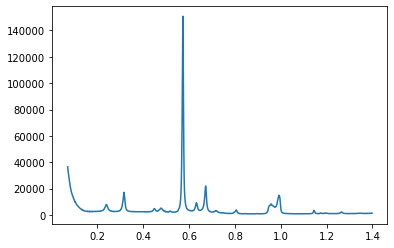

In [30]:
# this function will read in the 1D xrd data from Rice XRD .ras file


file_name = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/n3_hum_only_6min.txt'

file1 = open(file_name, 'r')
Lines = file1.readlines()
ct = 0
for line in Lines:
    ct+=1
    if '*RAS_INT_START' in line:
        index_begin = ct+1
    if '*RAS_INT_END' in line:
        index_end = ct-1

theta2 = []
intensity = []

count = 0
for line in Lines:
    count+=1
    if (count >= index_begin) & (count <= index_end):
        val = line.split(' ')
        theta2.append(float(val[0]))
        intensity.append(float(val[1]))

theta2 = np.array(theta2)
intensity = np.array(intensity)

# convert to q values

theta2q = lambda theta2: 4*np.pi/(1.5604)*np.sin(np.radians(theta2/2))

plt.plot(theta2q(theta2), intensity)


In [31]:
# function to convert .ras file into plotable data

def convert_ras_data(file_name):
    # this function returns 2 values, the q and the respective intensity

    file1 = open(file_name, 'r')
    Lines = file1.readlines()
    ct = 0
    for line in Lines:
        ct+=1
        if '*RAS_INT_START' in line:
            index_begin = ct+1
        if '*RAS_INT_END' in line:
            index_end = ct-1

    theta2 = []
    intensity = []

    count = 0
    for line in Lines:
        count+=1
        if (count >= index_begin) & (count <= index_end):
            val = line.split(' ')
            theta2.append(float(val[0]))
            intensity.append(float(val[1]))

    theta2 = np.array(theta2)
    intensity = np.array(intensity)

    # convert to q values

    theta2q = lambda theta2: 4*np.pi/(1.5604)*np.sin(np.radians(theta2/2))

    return theta2q(theta2), intensity



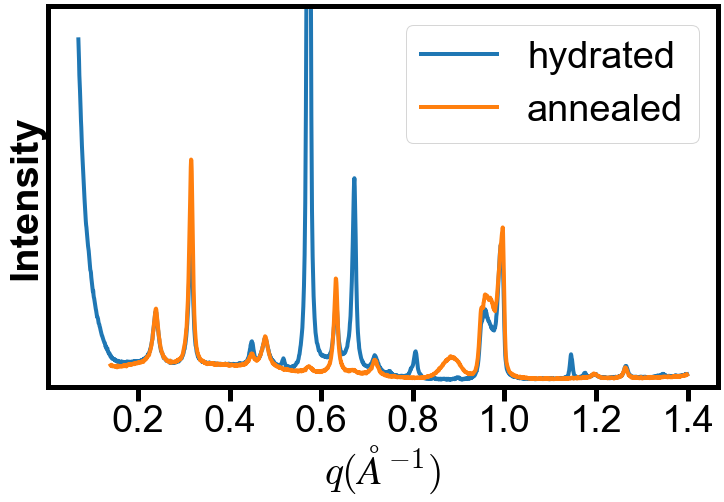

In [101]:
file_name1 = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/n3_hum_only_6min_annealed.txt'

file_name = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/n3_hum_only_6min.txt'

q, intensity = convert_ras_data(file_name)
q1, intensity1 = convert_ras_data(file_name1)

import matplotlib as mpl
mpl.rcParams["axes.linewidth"] = 5
mpl.rcParams["axes.labelsize"] = 40
mpl.rcParams["axes.labelweight"] = 'bold'
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['xtick.minor.size'] = 10
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['ytick.minor.size'] = 10
mpl.rcParams['xtick.major.width'] = 5
mpl.rcParams['ytick.major.width'] = 5
mpl.rcParams['xtick.minor.width'] = 4
mpl.rcParams['ytick.minor.width'] = 4
mpl.rcParams['font.size'] = 38
mpl.rcParams["font.family"] = 'Arial'
mpl.rcParams["font.weight"] = 'normal'
mpl.rcParams['text.usetex'] = False

plt.figure(figsize = (12,7))
plt.plot(q,intensity, linewidth = 4, label = 'hydrated')
plt.plot(q1,intensity1, linewidth = 4, label = 'annealed')
plt.yticks([])
plt.xlabel("$q (\AA^{-1})$")
plt.ylabel('Intensity')
plt.xticks(np.arange(.2,1.5,.2))
plt.ylim([100,40000])
plt.legend()


Text(0, 0.5, 'O.D.')

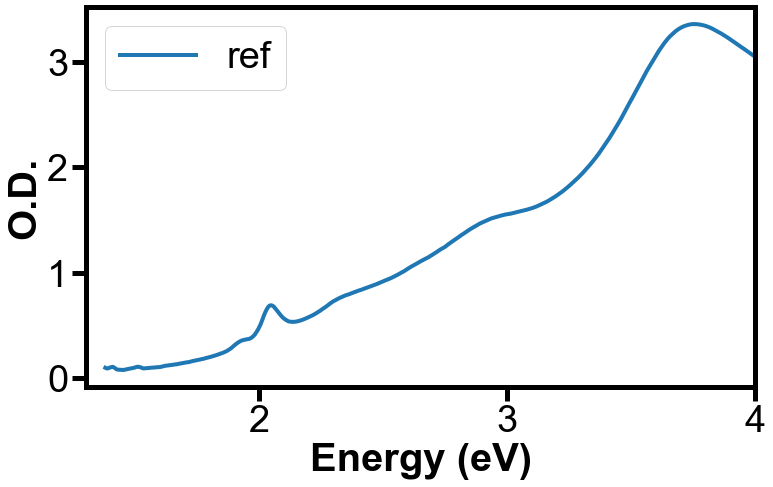

In [128]:
file_name1 = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/BA_n3_hum_only_6min_abs.csv'
file_name2 = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/BA_n3_ref_abs.csv'

abs = pd.read_csv(file_name1).to_numpy()
abs1 = pd.read_csv(file_name2).to_numpy()

plt.figure(figsize = (12,7))
# plt.plot(1240/abs[:,0], abs[:,1], linewidth = 4, label = 'hydrated')
plt.plot(1240/abs1[:,0], abs1[:,1],linewidth = 4, label = 'ref')
plt.xlim([1.3,4])
plt.legend()
plt.xlabel('Energy (eV)')
plt.ylabel('O.D.')

In [15]:
from re import L


class xrd_analysis():
    # this class is to analyze the 1D xrd pattern match it with cif files

    # ALL analysis and plotting will be in q values

    def __init__(self, data_file, cif_dir):
        import matplotlib as mpl
        mpl.rcParams["axes.linewidth"] = 3
        mpl.rcParams["axes.labelsize"] = 30
        mpl.rcParams["axes.labelweight"] = 'normal'
        mpl.rcParams['xtick.major.size'] = 10
        mpl.rcParams['xtick.minor.size'] = 8
        mpl.rcParams['ytick.major.size'] = 10
        mpl.rcParams['ytick.minor.size'] = 8
        mpl.rcParams['xtick.major.width'] = 3
        mpl.rcParams['ytick.major.width'] = 3
        mpl.rcParams['xtick.minor.width'] = 2
        mpl.rcParams['ytick.minor.width'] = 2
        mpl.rcParams['font.size'] = 38
        mpl.rcParams["font.family"] = 'Arial'
        mpl.rcParams["font.weight"] = 'normal'
        mpl.rcParams['text.usetex'] = False


        # get cif file directory with all the simulated 1D xrd (xy files)
        self.cif_dir = cif_dir
        self.cif_files = glob.glob(os.path.join(cif_dir, '*.xy'))
        self.data_name = data_file


    def convert_ras_data(self):
        # this function returns 2 values, the q and the respective intensity

        file1 = open(self.data_name, 'r')
        Lines = file1.readlines()
        ct = 0
        for line in Lines:
            ct+=1
            if '*RAS_INT_START' in line:
                index_begin = ct+1
            if '*RAS_INT_END' in line:
                index_end = ct-1

        theta2 = []
        intensity = []

        count = 0
        for line in Lines:
            count+=1
            if (count >= index_begin) & (count <= index_end):
                val = line.split(' ')
                theta2.append(float(val[0]))
                intensity.append(float(val[1]))

        theta2 = np.array(theta2)
        intensity = np.array(intensity)

        # convert to q values

        theta2q = lambda theta2: 4*np.pi/(1.5604)*np.sin(np.radians(theta2/2))

        return theta2q(theta2), intensity


    def plot_cif(self, which_cif = 'BA_n2'):

        if type(which_cif) != str:
            print('wrong plotting function')
            return None
        
        # finding the cif files in the set
        for i in self.cif_files:
            if which_cif in i:
                cif = i

        # loading the cif files
        cif_data = np.loadtxt(cif)

        cif_theta = cif_data[:,0]
        cif_intensity = cif_data[:,1]

        theta2q = lambda theta2: 4*np.pi/(.9184)*np.sin(np.radians(theta2/2))
        
        q, intensity = self.convert_ras_data()

        cif_q = theta2q(cif_theta)

        indx = np.argwhere(cif_q > q[-1])
        indx = indx[0][0]

        plt.figure(figsize = (9,5))
        plt.plot(cif_q[0:indx],cif_intensity[0:indx]/100, linewidth  = 4, label = which_cif)
        plt.plot(q,intensity/np.max(intensity), linewidth  = 4)
        plt.yticks([])
        plt.xlabel("$q (\AA^{-1})$")
        plt.ylabel('Intensity')
        plt.xticks(np.arange(.2,1.5,.2))
        plt.legend(fontsize = 20)

    

    def plot_multiple_cif(self, which_cif = []):

        theta2q = lambda theta2: 4*np.pi/(.9184)*np.sin(np.radians(theta2/2))
        
        q, intensity = self.convert_ras_data()

        plt.figure(figsize = (9,5))
        plt.plot(q,intensity/np.max(intensity), linewidth  = 4)

        
        for cif_file in which_cif:
            # finding the cif files in the set
            cif_found = False
            for i in self.cif_files:
                if cif_file in i:
                    cif = i
                    cif_found = True

            if cif_found == True:
                # loading the cif files
                cif_data = np.loadtxt(cif)

                cif_theta = cif_data[:,0]
                cif_intensity = cif_data[:,1]
                cif_q = theta2q(cif_theta)
                indx = np.argwhere(cif_q > q[-1])
                indx = indx[0][0]

                plt.plot(cif_q[0:indx],cif_intensity[0:indx]/100, linewidth  = 4, label = cif_file)
            else:
                print('cif file not found/matched')

        # plt.yticks([])
        plt.xlabel("$q (\AA^{-1})$")
        plt.ylabel('Intensity')
        plt.xticks(np.arange(.2,1.5,.2))
        plt.legend(fontsize = 20)

    
    def plot_multiple_data(self,filenames_set, dat_labels, log_y = False):

        # plot the first dataset
        q, intensity = self.convert_ras_data()
        intensity = intensity - np.min(intensity) #normalization

        plt.figure(figsize = (9,5))
        
        if log_y == True:
            plt.plot(q,np.log10(intensity/np.max(intensity)), linewidth  = 4, label = dat_labels[0])
        else:
            plt.plot(q,(intensity/np.max(intensity)), linewidth  = 4, label = dat_labels[0])



        for indx,file in enumerate(filenames_set):
            self.data_name = file
            q, intensity = self.convert_ras_data()
            intensity = intensity - np.min(intensity) #normalization
            
            if log_y == True:
                plt.plot(q,np.log10(intensity/np.max(intensity)), linewidth  = 4, label = dat_labels[indx+1])
            else:
                plt.plot(q,(intensity/np.max(intensity)), linewidth  = 4, label = dat_labels[indx+1])

        plt.yticks([])
        plt.xlabel("$q (\AA^{-1})$")
        plt.ylabel('Intensity')
        plt.xticks(np.arange(.2,1.5,.2))
        plt.legend(fontsize = 20)
        
        return None

            
            


    


<IPython.core.display.Javascript object>


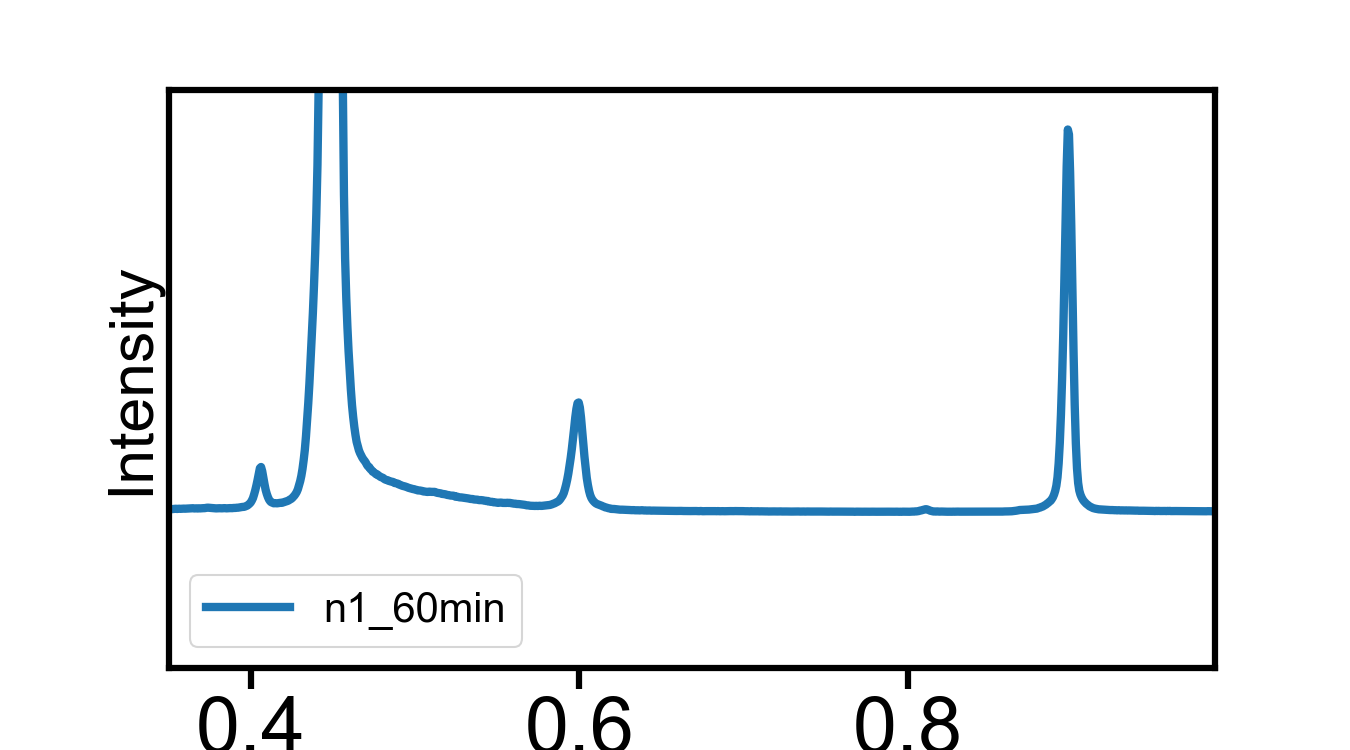

(0.2, 1.1)

In [26]:
%matplotlib notebook
file_name = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/degraded_60min_n1.txt'
cif_dir = '/Users/wenbinli/Library/CloudStorage/Box-Box/Cif files/'


file_name1 = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/n1_degraded_white-turning-yellow_after.txt'

file_name2 = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/n3_degraded_white-turning-brown_003.ras'

file_name3 = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/n3_hum_only_6min.txt'

file_name4 = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/MAPI degraded 15min.txt'


BA_n1_hum_only_60min = xrd_analysis(data_file= file_name, cif_dir= cif_dir)

BA_n1_hum_only_120min = xrd_analysis(data_file= file_name1, cif_dir= cif_dir)

BA_n3_hum_only_120min = xrd_analysis(data_file= file_name2, cif_dir= cif_dir)

# BA_n1_hum_only_60min.plot_multiple_data(filenames_set=[file_name1,file_name2], dat_labels = ['60min', '120min', 'n3_60min'])

# BA_n3_hum_only_120min.plot_multiple_cif(which_cif = [ 'MAPbI3-H2O', 'PbI2'])
# # BA_n1_hum_only_60min.plot_multiple_cif(which_cif = ['BA_n1'])
# # plt.ylim([0,.1])
# plt.xlim([.2,1.1])
# plt.xticks(np.arange(.35,.8,.05))

# BA_n3_hum_only_120min.plot_multiple_data(filenames_set=[file_name3], dat_labels= ['super','normal'])
# plt.ylim([0,.3])
# plt.xlim([.2,1.1])


# BA_n3_hum_only_120min.plot_multiple_data(filenames_set=[file_name3], dat_labels= ['120 min','60 min'])
# # plt.ylim([0,.1])
# plt.xlim([.2,1.1])

# # BA_n1_hum_only_120min.plot_multiple_cif(which_cif = ['BA_n1'])
# # plt.ylim([0,.1])
# # plt.xlim([.2,1.1])


# BA_n1_hum_only_60min.plot_multiple_data(filenames_set=[file_name1,file_name2], dat_labels = ['n1_60min', 'n1_120min', 'n3_120min'])
# # plt.ylim([0,.2])
# plt.xlim([.2,1.1])

BA_n1_hum_only_60min.plot_multiple_data(filenames_set=[], dat_labels = ['n1_60min'])
plt.xlim([.2,1.1])

In [217]:
theta2q = lambda theta2: 4*np.pi/(1.5406)*np.sin(np.radians(theta2/2))

print(theta2q(11.44))

q2theta = lambda q: 2*np.degrees(np.arcsin(1.5406*q/(4*np.pi)))

print(q2theta(.811))

0.8129647608887748
11.412260097906453


In [218]:
file_name = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/degraded_60min_n1.txt'
file_name1 = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/n3_hum_only_6min.txt'

cif_dir = '/Users/wenbinli/Library/CloudStorage/Box-Box/Cif files/'

BA_n1_hum_60min = xrd_analysis(data_file= file_name, cif_dir= cif_dir)
BA_n3_hum_6min = xrd_analysis(data_file= file_name1, cif_dir= cif_dir)

q_n1, int_n1 = BA_n1_hum_60min.convert_ras_data()
q_n3, int_n3 = BA_n3_hum_6min.convert_ras_data()


(0.2, 1.0)

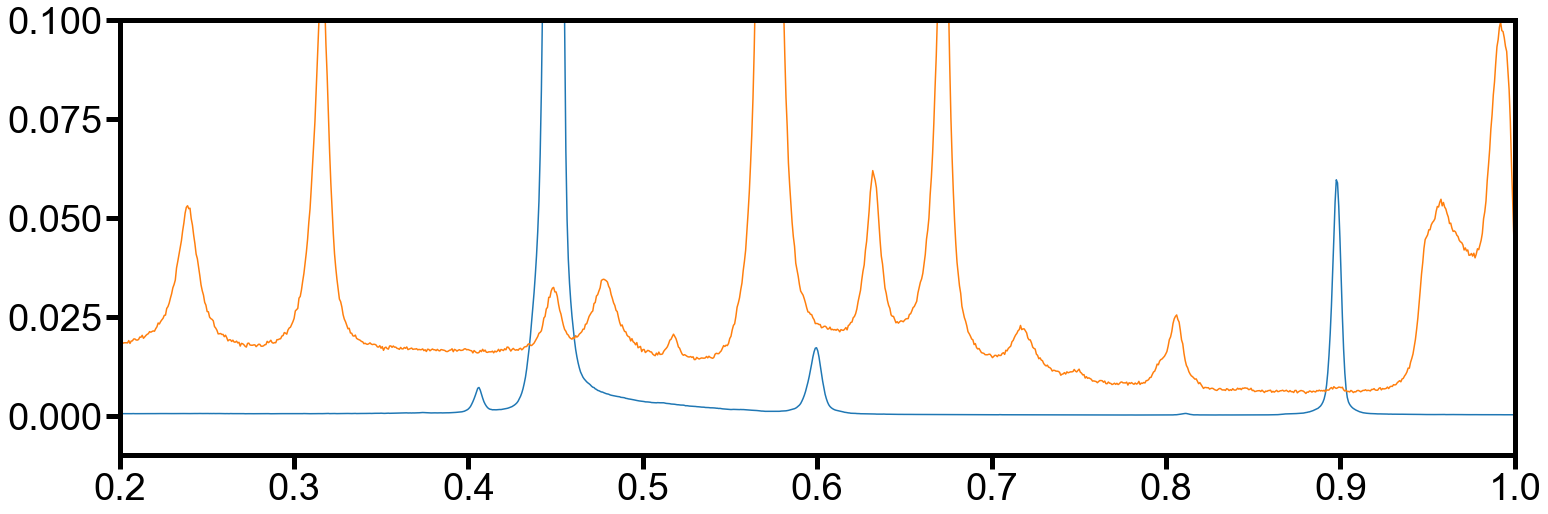

In [230]:
plt.figure(figsize = (25,8))
plt.plot(q_n1, int_n1/max(int_n1))
plt.plot(q_n3, int_n3/max(int_n3))
plt.ylim([-.01,.1])
plt.xlim([.2,1])

In [66]:
filepath = '/Users/wenbinli/Library/CloudStorage/Box-Box/BNL March 2022 Data/AMohite2/maxs/raw'

file = filepath +'/'+"FAPI_MACl_hum_light_4_113.6s_RH94.012_x-0.000_th0.200_1.00s_451095_maxs.tiff"

G1 = GIWAXS_analysis(calibration_obj = c1, mask_obj = m1, name = 'test', filename = file)


In [88]:
import math as m

4*m.pi/(1.5604)*m.sin(m.radians(9.6)/2)

0.6738828451193026

In [89]:
theta2q = lambda x: 4*np.pi/(1.5604)*np.sin(np.radians(x/2))

In [79]:
import os

In [80]:
file= '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/BA_n3_degraded_1dXRD.txt'

data = np.loadtxt(file)


(0.4, 1.0)

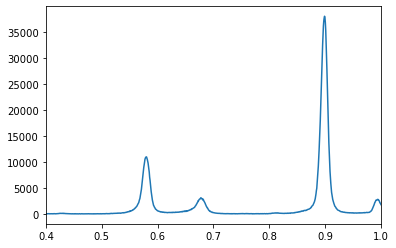

In [92]:

plt.plot(theta2q(data[:,0]),data[:,1])
plt.xlim([.4,1])

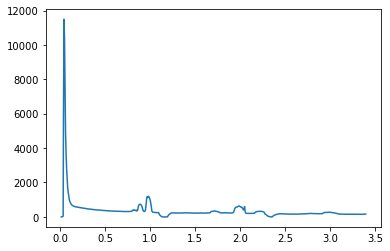

In [71]:
plt.plot(G1.sector_cut(0,30)[0],G1.sector_cut(0,30)[1])

In [151]:
# time series absorption plotting


abs_dir = '/Users/wenbinli/Library/CloudStorage/Box-Box/perovskite_degradation/Absorption experiment/BA_n3_trial_1'



infiles = glob.glob(os.path.join(abs_dir,'*.dat'))

data_files = []
for i in infiles:
    # get all the data_files and sort them
    if ('background' not in i) | ('bg' not in i):

        t = i.split('min')[1][:3]
        
        print(i.split('min')[1][:3])

    

000
053
010
041
072
023
004
080
029
016


IndexError: list index out of range